In [17]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################
# Load Packages / libraries
import numpy as np
import pandas as pd
import pypyodbc as podbc
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Configure notebook settings
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) # To change scientific numbers to float
sns.set(rc={'figure.figsize':(8,6)}) # Increases the size of sns plots

# Loading the data
df = pd.read_csv('../00. output/clean.csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(14778, 13)


,age,are_food_areas_important_to_you,current_status,did_you_find_our_events_value_for_money,do_you_enjoy_adrenaline_rush_activities,favourite_attraction,gender,how_many_hours_are_you_willing_to_travel_to_attend_an_event,how_often_you_attend_entertaining_events_in_a_year,social_media,total_household_income,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people
0,40-49,Entirely agree,Married with children,Somewhat disagree,Entirely disagree,Ice Bar,Female,3 hours,4 Times a Year,Up to 1 hour,"50,000 to 74,999",Somewhat agree,Somewhat Unlikely
1,60-64,Entirely agree,Married with children,Entirely disagree,Somewhat disagree,Happy Rollercoaster,Male,5 hours,3 Times a Year,Up to 1 hour,"35,000 to 49,999",Mostly agree,Somewhat Likely
2,50-59,Somewhat agree,Married with children,Entirely disagree,Somewhat disagree,Happy Rollercoaster,Male,5 hours,3 Times a Year,I don't spend any time at all,"75,000 to 99,999",Mostly agree,Mostly Unlikely
3,50-59,Neither agree nor disagree,Married without children,Somewhat disagree,Entirely agree,Crazy rollercoaster ride,Female,1 hour,1 Times a Year,Half a day,"35,000 to 49,999",Somewhat agree,Somewhat Likely
4,60-64,Neither agree nor disagree,Married with children,Entirely agree,Mostly disagree,Kids Playground,Male,6 hours plus,3 Times a Year,Up to 1 hour,"100,000 to 149,999",Entirely agree,Very Unlikely


In [18]:
##########################################################
######### Encode categorical variables to num. ########### 
##########################################################
# Original/raw data
print(f"Shape of original data: ", df.shape)

# Encoded data shape
df = pd.get_dummies(df)
print(f"Shape of encoded data: ", df.shape)

df.head()

Shape of original data:  (14778, 13)
Shape of encoded data:  (14778, 86)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,are_food_areas_important_to_you_Entirely agree,...,were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree,were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat agree,were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree,would_you_recommend_our_events_to_other_people_Mostly Likely,would_you_recommend_our_events_to_other_people_Mostly Unlikely,would_you_recommend_our_events_to_other_people_Neither agree nor disagree,would_you_recommend_our_events_to_other_people_Somewhat Likely,would_you_recommend_our_events_to_other_people_Somewhat Unlikely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


At 2 clusters, the intertia is: 125619.02972065711
At 3 clusters, the intertia is: 114905.38346130146
At 4 clusters, the intertia is: 106337.17594801621
At 5 clusters, the intertia is: 100865.1729715391
At 6 clusters, the intertia is: 96432.61527743531
At 7 clusters, the intertia is: 93814.49897631718
At 8 clusters, the intertia is: 91590.32870109123
At 9 clusters, the intertia is: 89725.51400872343
At 10 clusters, the intertia is: 88467.37661887113
At 11 clusters, the intertia is: 87556.04783513471
At 12 clusters, the intertia is: 86587.76029885457
At 13 clusters, the intertia is: 85980.06591463834
At 14 clusters, the intertia is: 85052.82853329318
At 15 clusters, the intertia is: 84254.01077256388


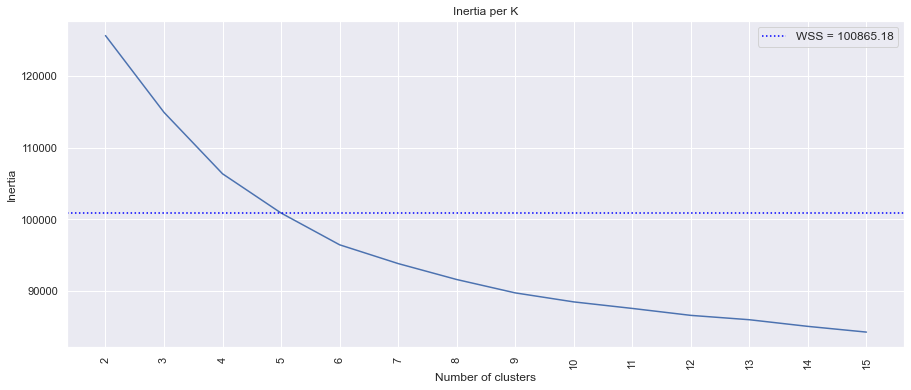

In [19]:
##########################################################
############## K-Means Clustering Training ############### 
##########################################################
X_train = df.values
no_of_clusters = range(2,16) 
inertia = [] # the within-cluster sum of squares 

# Running K means with multible Ks
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=100)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("At", f, "clusters, the intertia is:", u)
    
# Creating the scree plot for intertia
fig, (ax1) = plt.subplots(1, figsize=(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia per K")
plt.axhline(100865,linestyle=':', label='WSS = 100865.18', c ="blue")
plt.legend(prop=dict(size=12))
plt.savefig('../00. output/inertia_before_pca.png')

In [20]:
##########################################################
########### K-Means Clustering Results (k=5) ############# 
##########################################################
# # Running K means on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)
kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a dataframe for cluster counts
counts_df = pd.DataFrame(counts, columns = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4","Cluster 5"])
counts_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,2208,1226,8492,1865,987


Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 576x432 with 0 Axes>

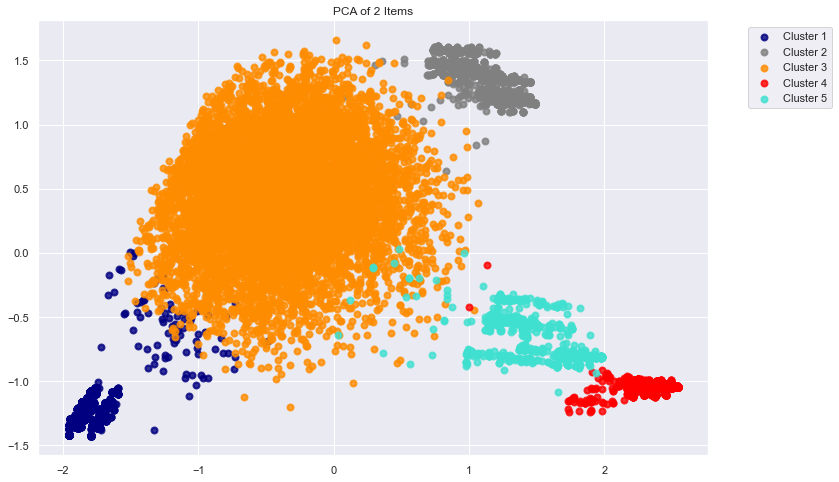

In [21]:
##########################################################
#################### Instantiate PCA ##################### 
##########################################################
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Init PCA to visualize the data
X = X_train
y_num = kmeans.predict(X_train)

target_names = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4","Cluster 5"]
pca = PCA(n_components=2, random_state = 100) #take 2 principal components 
X_r = pca.fit(X).transform(X) #take X_train shape (86 features) -> 2

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'grey', 'darkorange', 'red', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    """
    Build the scatter plot with the n clusters.

        Parameters:
            n_components: 
            random_state: 
            lw: A decimal integer
            target_names: A list of cluster string names

        Returns:
            plt: Figure of clusters PCA built on n components
            savefig: PCA_plt.png 
    """
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.savefig('../00. output/PCA_scatterplot_before_feature_engineering.png')
plt.show()

In [22]:
# By maximizing between cluster variance, we minimize within-cluster variance. 
# Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans

# Trying with Dimentionality reduction and then Kmeans
n_components = X.shape[1] #number of columns

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 100)
X_r = pca.fit(X).transform(X)

# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_) #sum no. of variance across all components
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95 #this is our variance cutoff (indicates the number of components to use for Kmeans)
print("The 95% variance we want to have is: ", var_95) 
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 45 n_compononets: ", sum(a["Explained Variance"][0:45]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 51 n_compononets: ", sum(a["Explained Variance"][0:51]))
print("Variance explain with 52 n_compononets: ", sum(a["Explained Variance"][0:52]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 54 n_compononets: ", sum(a["Explained Variance"][0:54]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))


Total Variance in our dataset is:  9.789277508428574
The 95% variance we want to have is:  9.299813633007146

Variance explain with 45 n_compononets:  8.877493928813402
Variance explain with 50 n_compononets:  9.157222065601196
Variance explain with 51 n_compononets:  9.207825714561626
Variance explain with 52 n_compononets:  9.25531846074175
Variance explain with 53 n_compononets:  9.301801997586798
Variance explain with 54 n_compononets:  9.347060898273323
Variance explain with 55 n_compononets:  9.391528190593437
Variance explain with 60 n_compononets:  9.59227498090357


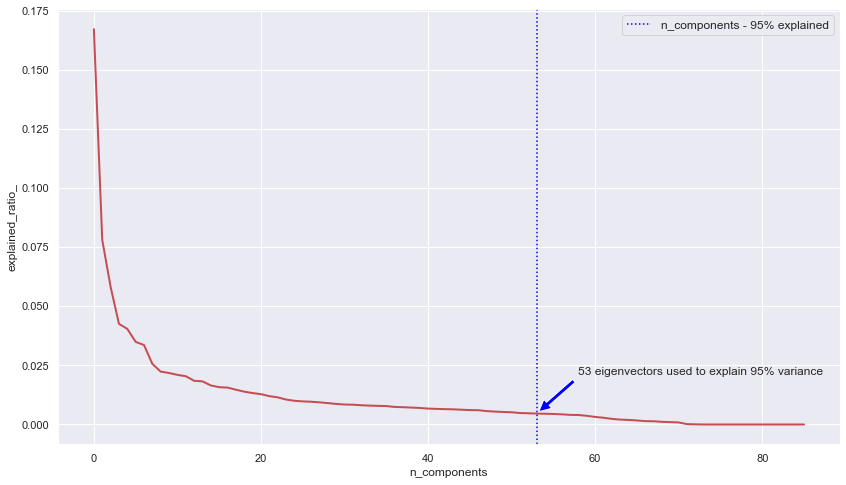

In [23]:
# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line @ 95% e.v. 
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', 
            xy=(53, pca.explained_variance_ratio_[53]), 
            xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05),
            )
plt.savefig('../00. output/PCA_analysis_before_feature_engineering.png.png')
plt.show()

At 2 clusters, the intertia is: 118418.44975287784
At 3 clusters, the intertia is: 107707.24296931326
At 4 clusters, the intertia is: 99151.28497637965
At 5 clusters, the intertia is: 93688.72370730339
At 6 clusters, the intertia is: 89260.26708916224
At 7 clusters, the intertia is: 86642.72943169401
At 8 clusters, the intertia is: 84676.82759241518
At 9 clusters, the intertia is: 83439.6934785844
At 10 clusters, the intertia is: 81654.83996632893
At 11 clusters, the intertia is: 80345.23570356962
At 12 clusters, the intertia is: 79443.7564709143
At 13 clusters, the intertia is: 78715.81840329566
At 14 clusters, the intertia is: 77832.16127532841
At 15 clusters, the intertia is: 77143.74891929558
At 16 clusters, the intertia is: 76462.26912583988
At 17 clusters, the intertia is: 76138.11487604561
At 18 clusters, the intertia is: 75200.29369922163
At 19 clusters, the intertia is: 74947.2492274394


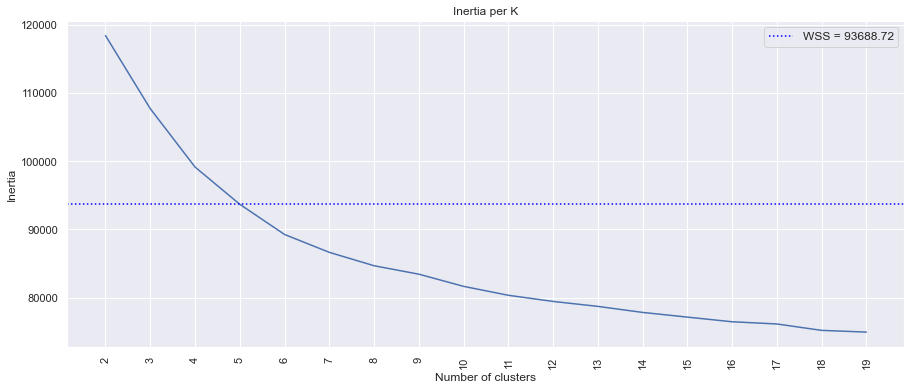

In [24]:
##########################################################
############## K-Means Clustering Training ############### 
##########################################################
no_of_clusters = range(2,20)
n_components = 53

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 100)
X_r = pca.fit(X).transform(X)
inertia = [] # the within-cluster sum of squares 

# Running K means with multible Ks
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=100)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("At", f, "clusters, the intertia is:", u)
    
# Creating the scree plot for intertia
fig, (ax1) = plt.subplots(1, figsize=(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia per K")
plt.axhline(93688,linestyle=':', label='WSS = 93688.72', c ="blue")
plt.legend(prop=dict(size=12))
plt.savefig('../00. output/inertia_after_pca.png')

